In [1]:
from pylab import *

epochs = 2000

N_test = 10
N_repeat = 10
d = 20

losses_ = np.zeros((4,2,N_test,N_repeat,epochs))
sr_ = np.zeros((4,2,N_test,N_repeat,5,int(epochs/d)))
trn_psnr_ = np.zeros((4,2,N_test,N_repeat,epochs))
tst_psnr_ = np.zeros((4,2,N_test,N_repeat,epochs))


file_path = 'Final_1n/'
file_names = ['no','basic','rff','rbf']

In [2]:
for i in range(len(file_names)):
    file_name = file_names[i]
    losses_[i] = np.load(file_path+file_name+'_losses.npy')
    sr_[i] = np.load(file_path+file_name+'_sr.npy')
    trn_psnr_[i] = np.load(file_path+file_name+'_trn.npy')
    tst_psnr_[i] = np.load(file_path+file_name+'_tst.npy')

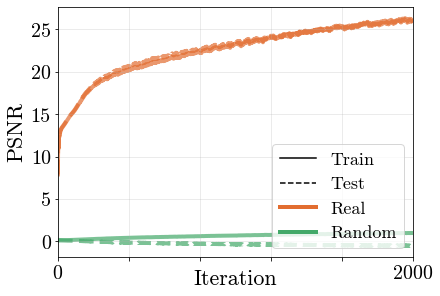

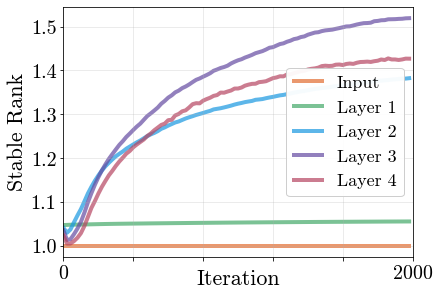

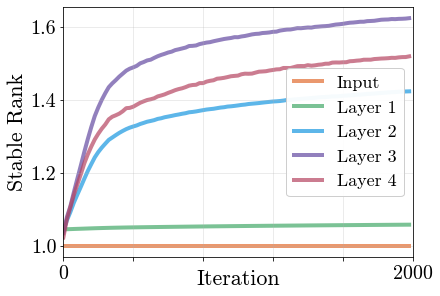

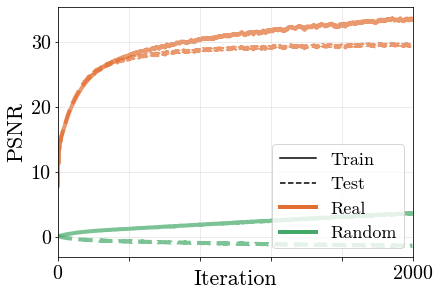

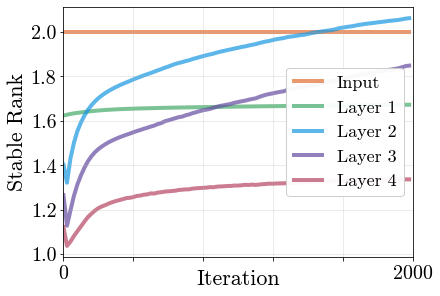

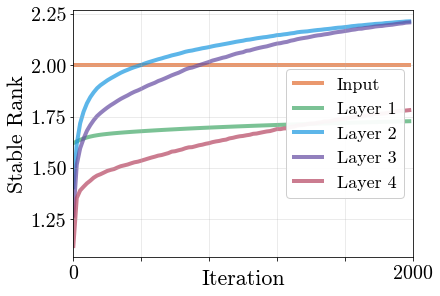

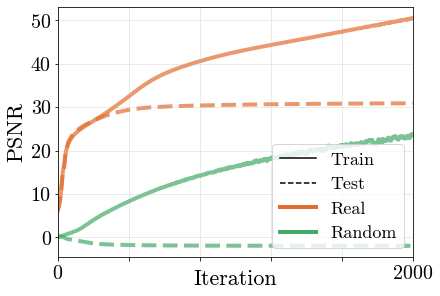

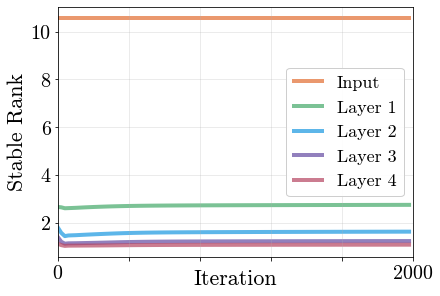

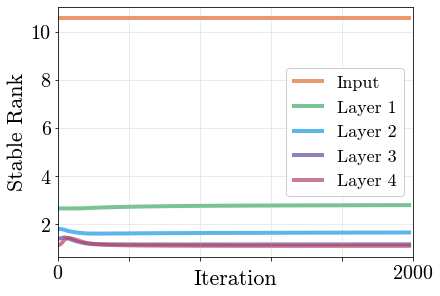

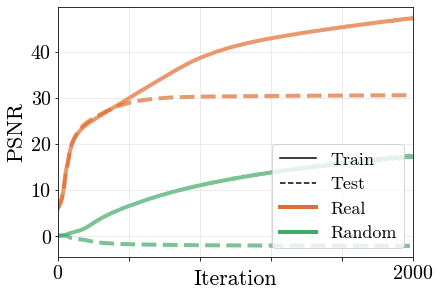

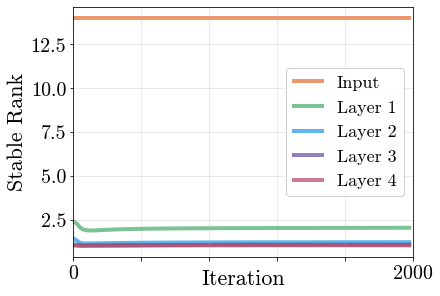

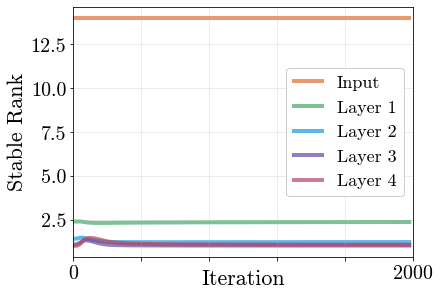

In [16]:
import matplotlib.patches as patches
import matplotlib.pylab as pylab
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

file_path = 'images/'

params = {'legend.fontsize': 18,
         'axes.labelsize': 22,
         'axes.titlesize': 22,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'serif'

plt.rcParams["font.family"] = "cmr10"


colors_k = np.array([[0.8872, 0.4281, 0.1875],
     #[0.8136, 0.6844, 0.0696],
    [0.2634, 0.6634, 0.4134],
    [0.0943, 0.5937, 0.8793],
    [0.3936, 0.2946, 0.6330],
    [0.7123, 0.2705, 0.3795]])
linewidth = 4
line_alpha = .7
title_offset = -0.2

names = ['No','Basic','RFF','Gaussian']

for i in range(4):
    fig1 = plt.figure(constrained_layout=True, figsize=(6,4))
    gs = fig1.add_gridspec(1, 1)
    ax = fig1.add_subplot(gs[0, 0])
    expn = i
    ax.plot(np.mean(trn_psnr_[expn,0],(0,1)),color=colors_k[0],label='train on real signal', linewidth=linewidth, alpha=line_alpha, zorder=1)
    ax.plot(np.mean(tst_psnr_[expn,0],(0,1)),'--',color=colors_k[0],label='test on real signal', linewidth=linewidth, alpha=line_alpha, zorder=1)
    ax.plot(np.mean(trn_psnr_[expn,1],(0,1)),color=colors_k[1],label='train on random noise', linewidth=linewidth, alpha=line_alpha, zorder=1)
    ax.plot(np.mean(tst_psnr_[expn,1],(0,1)),'--',color=colors_k[1],label='train on random nois', linewidth=linewidth, alpha=line_alpha, zorder=1)

    plt.autoscale(enable=True, axis='x', tight=True)
    ax.set_xticks([0,400,800,1200,1600,2000])
    ax.set_xticklabels(['$0$','','','','','$2000$'])
    plt.xlabel('Iteration', labelpad=-13)
    plt.ylabel('PSNR')
    custom_lines = [Line2D([], [], color='k', linestyle='-'),
                    Line2D([], [], color='k', linestyle='--'),
                Line2D([], [], color=colors_k[0], linewidth=linewidth),
                Line2D([], [], color=colors_k[1], linewidth=linewidth)]

    ax.legend(custom_lines, ['Train', 'Test','Real','Random'], loc='lower right',  ncol=1)
    plt.grid(True, which='both', alpha=.3)
    #ax.set_title('(a) '+names[i]+' embedding', y=title_offset)
    
    plt.savefig(file_path+'First_'+file_names[i]+'_PSNR.pdf', bbox_inches='tight', pad_inches=0)
    
    fig1 = plt.figure(constrained_layout=True, figsize=(6,4))
    gs = fig1.add_gridspec(1, 1)
    ax = fig1.add_subplot(gs[0, 0])
    for l in range(5):
        if l == 0:
            ax.plot(range(0,100),np.mean(sr_[expn,0,:,:,l],(0,1)),color=colors_k[l],label='Input', linewidth=linewidth, alpha=line_alpha, zorder=1)
        else:
            ax.plot(range(0,100),np.mean(sr_[expn,0,:,:,l],(0,1)),color=colors_k[l],label='Layer {}'.format(l), linewidth=linewidth, alpha=line_alpha, zorder=1)

    plt.autoscale(enable=True, axis='x', tight=True)
    ax.set_xticks([0,20,40,60,80,100])
    ax.set_xticklabels(['$0$','','','','','$2000$'])
    plt.xlabel('Iteration', labelpad=-13)
    plt.ylabel('Stable Rank')
    ax.legend(loc='center right',  ncol=1, framealpha=.95, handlelength=1.6)
    plt.grid(True, which='both', alpha=.3)
    #ax.set_title('(b) Real Signal', y=title_offset)
    plt.savefig(file_path+'First_'+file_names[i]+'_SR_real.pdf', bbox_inches='tight', pad_inches=0)
    
    fig1 = plt.figure(constrained_layout=True, figsize=(6,4))
    gs = fig1.add_gridspec(1, 1)
    ax = fig1.add_subplot(gs[0, 0])
    for l in range(5):
        if l == 0:
            ax.plot(range(0,100),np.mean(sr_[expn,1,:,:,l],(0,1)),color=colors_k[l],label='Input', linewidth=linewidth, alpha=line_alpha, zorder=1)
        else:
            ax.plot(range(0,100),np.mean(sr_[expn,1,:,:,l],(0,1)),color=colors_k[l],label='Layer {}'.format(l), linewidth=linewidth, alpha=line_alpha, zorder=1)
    plt.autoscale(enable=True, axis='x', tight=True)
    ax.set_xticks([0,20,40,60,80,100])
    ax.set_xticklabels(['$0$','','','','','$2000$'])
    plt.xlabel('Iteration', labelpad=-13)
    plt.ylabel('Stable Rank')
    ax.legend(loc='center right',  ncol=1, framealpha=.95, handlelength=1.6)
    plt.grid(True, which='both', alpha=.3)
    
    #ax.set_title('(c) Random Noise', y=title_offset)
    
    plt.savefig(file_path+'First_'+file_names[i]+'_SR_noise.pdf', bbox_inches='tight', pad_inches=0)